In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import approx_fprime
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

# Уровень 0
Посчитайте частные производные функций:<br>
1) $f(x,y)=2x^2y^3 + \frac{1}{x} + y^2x + 7$, а для этой функции также градиент в точке $(1,2)$<br>
<br>
$\frac{\partial}{\partial x}\left(2x^2y^3 + \frac{1}{x} + y^2x + 7\right)=-\frac{1}{x^2}+4xy^3+y^2$<br>
$\frac{\partial}{\partial y}\left(2x^2y^3 + \frac{1}{x} + y^2x + 7\right)=2xy(3xy+1)$<br>
<br>
$\triangledown f(1,2)=(-1+32+4,4(6+1))=(35,28)$

2) $f(x,y)=x^2y - \sin{xy} + \cos{x^2} + 6y$<br>
<br>
$\frac{\partial}{\partial x}\left(x^2y - \sin{xy} + \cos{x^2} + 6y\right)=2x(y - \sin{x^2})-y\cos{xy}$<br>
$\frac{\partial}{\partial y}\left(x^2y - \sin{xy} + \cos{x^2} + 6y\right)=x^2-x\cos{xy}+6$

# Уровень 1
Градиентный спуск своими руками:

In [2]:
def f(x):
    """x: numpy.ndarray of size 2"""
    return x[0]**2 + x[1]**2

In [3]:
eps = np.sqrt(np.finfo(float).eps)

In [4]:
# сразу приводим x к типу float
x = np.array([100.0, 200.0])
learning_rate = 0.1

In [5]:
# сохраним значения x, чтобы потом построить график градиентного спуска
x_0, x_1 = [], []

for i in range(100):
    x_0.append(x[0])
    x_1.append(x[1])
    grad = approx_fprime(x, f, [eps, eps])
    x -= learning_rate * grad

Визуализируем.

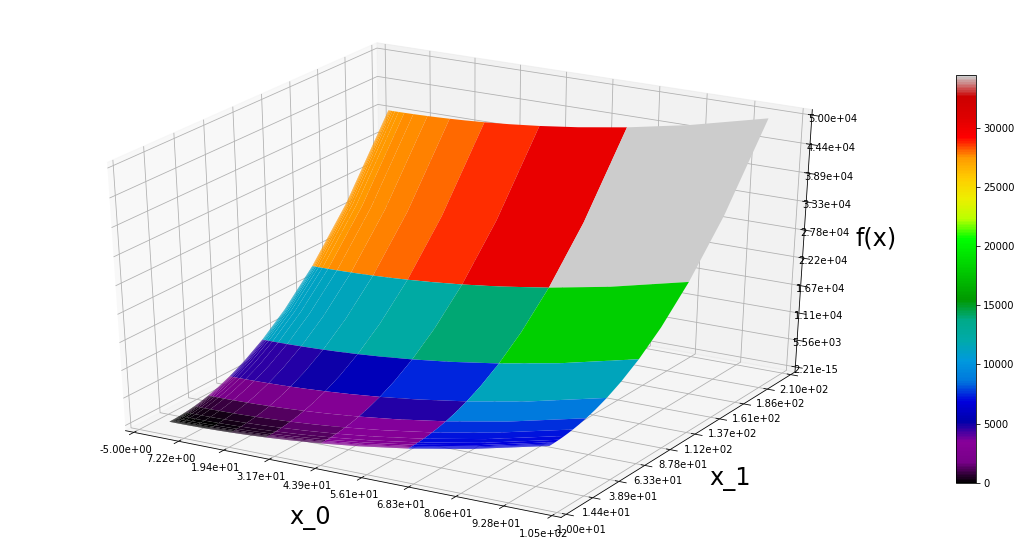

In [6]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(np.array(x_0), np.array(x_1))
Z = X ** 2 + Y ** 2

surf = ax.plot_surface(X, Y, Z, cmap=cm.nipy_spectral)

ax.xaxis.set_major_locator(LinearLocator(10))
ax.yaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_locator(LinearLocator(10))

ax.xaxis.set_major_formatter(FormatStrFormatter('%2.2e'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2e'))
ax.zaxis.set_major_formatter(FormatStrFormatter('%2.2e'))

ax.set_xlabel('x_0', labelpad=20, fontsize=24)
ax.set_ylabel('x_1', labelpad=20, fontsize=24)
ax.set_zlabel('f(x)', labelpad=20, fontsize=24)

fig.colorbar(surf, shrink=0.75)

plt.show()

Какая-то корявенькая визуализация. Ну, я сделал всё, что мог, пусть другие сделают лучше. (:

In [7]:
print(f'Минимум достигается в: {x[0]}, {x[1]}')
print(f'Значение функции в минимуме: {f(x)}')

Минимум достигается в: 1.2919781081695102e-08, 3.32901401432712e-08
Значение функции в минимуме: 1.2751541739575636e-15


Проверка с помощью встроенной функции np.gradient() не получилась, поскольку, как верно заметили в конспекте (лонгрид 5, страница 3, предложение 1 (: ), _"что она считает не очень понятно, так что ей лучше не пользоваться"._ (: Мне не удалось разобраться, как из нового посчитанного градиента вытащить значение функции в минимуме.<br>
<br>
Проверка с помощью функции scipy.optimize.minimize() **тоже** не удалась, т. к., по условию задания (ячейка 5 в ноутбуке), мы проводим всего 100 итераций градиентного спуска, а, какие бы параметры minimize() я ни выставляла (ну, параметр 'tol', естественно, всегда был <= 1e-15, т. е., меньше того, что у нас получилось), с любыми параметрами функция minimize() проводила больше 100 итераций спуска (количество итераций не настраиваемо) и получала результат 0.000000. :(